# In-Depth Analysis of Marmara Region Seismicity (April 23-24, 2025)

**Dataset:** `deprem_son24saat_duzenli.csv`

**Source:** Boğaziçi University Kandilli Observatory and Earthquake Research Institute (KOERI)

**Time Period:** April 23, 2025 – April 24, 2025 (24-hour snapshot)

**Region:** Marmara Sea and surrounding areas (Istanbul, Tekirdağ, etc.)

**Objective:** To perform a comprehensive exploratory data analysis (EDA) on the seismic events recorded in the Marmara region over a specific 24-hour period. This analysis aims to understand the characteristics, distribution, and potential patterns within this seismically active zone.

**Significance:** The Marmara Region, particularly near the North Anatolian Fault Line (NAF), is highly seismically active and densely populated. Analyzing even short periods of activity provides valuable insights for risk assessment, research, and public awareness.

#  About the Author

**👤 Name:** Muhammad Umer  
**🔗 LinkedIn:** [https://www.linkedin.com/in/therealumerhayat/](https://www.linkedin.com/in/therealumerhayat/)  
**📧 Gmail:** umerhayat282@gmail.com  
**📞 Contact Number:** +92 302 9854427 / +92 317 6239577

****

## 1. Setup and Data Loading

Import necessary libraries and load the dataset into a pandas DataFrame.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium # For interactive maps
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings("ignore")

# Set plotting style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Default figure size

# Define the file path
file_path = r'C:\Users\abc\Downloads\deprem_son24saat_duzenli.csv'

# Load the dataset
# Important: Use skipinitialspace=True to handle potential spaces after commas
# Specify parse_dates for the timestamp column immediately
try:
    df_raw = pd.read_csv(file_path, skipinitialspace=True, encoding='iso-8859-9') # Try common Turkish encoding
except UnicodeDecodeError:
    try:
        df_raw = pd.read_csv(file_path, skipinitialspace=True, encoding='utf-8') # Try UTF-8
    except Exception as e:
        print(f"Error loading CSV: {e}")
        print("Please check the file path and encoding.")
        # Exit or raise error if loading fails
        raise

print(f"Successfully loaded data with {df_raw.shape[0]} rows and {df_raw.shape[1]} columns.")
df_raw.head()

Successfully loaded data with 289 rows and 6 columns.


,Olus_Zamani,Enlem,Boylam,Derinlik_km,Buyukluk,Yer
0,2025.04.23 13:01:02,40.8427,28.3802,21.3,4.3,MARMARA DENIZI
1,2025.04.23 13:02:32,40.8640,28.4223,18.7,5.2,MARMARA DENIZI
2,2025.04.23 13:05:43,40.8213,28.2977,12.3,3.3,MARMARA DENIZI
3,2025.04.23 13:06:59,40.8662,28.4270,22.9,3.6,MARMARA DENIZI
4,2025.04.23 13:07:30,40.8252,28.3233,11.0,3.3,MARMARA DENIZI


***

## 2. Data Cleaning and Preprocessing

Inspect the data types, handle potential inconsistencies, missing values, and format columns correctly.

In [19]:
# Create a copy to keep the raw data intact
df = df_raw.copy()

# --- Inspect Data Types and Basic Info ---
print("--- Initial Data Info ---")
df.info()

print("\n--- Initial Descriptive Statistics (Object columns included) ---")
print(df.describe(include='all'))

# --- Data Type Conversion and Cleaning ---

# 1. Timestamp ('Olus_Zamani'): Convert to datetime objects
try:
    df['Olus_Zamani'] = pd.to_datetime(df['Olus_Zamani'], format='%Y.%m.%d %H:%M:%S')
    print("\nSuccessfully converted 'Olus_Zamani' to datetime.")
except Exception as e:
    print(f"\nError converting 'Olus_Zamani': {e}")
    print("Check the timestamp format in the CSV.")

# 2. Numeric Columns: Ensure 'Enlem', 'Boylam', 'Derinlik_km', 'Buyukluk' are numeric (float).
# The skipinitialspace=True during loading should have helped, but we verify and convert.
numeric_cols = ['Enlem', 'Boylam', 'Derinlik_km', 'Buyukluk']
for col in numeric_cols:
    if df[col].dtype == 'object':
        print(f"Column '{col}' is object type, attempting conversion to numeric...")
        # Attempt to strip any extra characters (like spaces) and convert
        df[col] = pd.to_numeric(df[col].astype(str).str.strip(), errors='coerce')
    elif not pd.api.types.is_numeric_dtype(df[col]):
         df[col] = pd.to_numeric(df[col], errors='coerce') # Force conversion if not already numeric


# 3. Location ('Yer'): Clean up whitespace and potential artifacts.
if 'Yer' in df.columns:
    df['Yer'] = df['Yer'].astype(str).str.strip()
    # Remove potential revision notes like 'REVIZE01 ...'
    df['Yer'] = df['Yer'].str.replace(r'\s*REVIZE\d+\s*\(.*\)\s*$', '', regex=True)
    print("\nCleaned 'Yer' column (stripped whitespace, removed REVIZE notes).")


# --- Check for Missing Values after Conversion ---
print("\n--- Missing Values After Cleaning ---")
print(df.isnull().sum())

# Optional: Handle missing values if any were introduced (e.g., due to conversion errors)
# Example: Drop rows with missing critical data like coordinates or magnitude
# df.dropna(subset=['Enlem', 'Boylam', 'Buyukluk', 'Derinlik_km'], inplace=True)

# --- Verify Data Types After Cleaning ---
print("\n--- Data Info After Cleaning ---")
df.info()

# --- Display Cleaned Data Sample ---
print("\n--- Cleaned Data Sample ---")
print(df.head())

# --- Final Descriptive Statistics (Numeric columns) ---
print("\n--- Descriptive Statistics (Numeric Columns) After Cleaning ---")
print(df[numeric_cols].describe())

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Olus_Zamani  289 non-null    object 
 1   Enlem        289 non-null    float64
 2   Boylam       289 non-null    float64
 3   Derinlik_km  289 non-null    float64
 4   Buyukluk     289 non-null    float64
 5   Yer          289 non-null    object 
dtypes: float64(4), object(2)
memory usage: 13.7+ KB

--- Initial Descriptive Statistics (Object columns included) ---
                Olus_Zamani       Enlem      Boylam  Derinlik_km    Buyukluk  \
count                   289  289.000000  289.000000   289.000000  289.000000   
unique                  289         NaN         NaN          NaN         NaN   
top     2025.04.24 12:06:39         NaN         NaN          NaN         NaN   
freq                      1         NaN         NaN          NaN         NaN   
mean           

***

## 3. Exploratory Data Analysis (EDA)

Analyze the distributions, relationships, and patterns within the cleaned data.

### 3.1. Univariate Analysis (Single Variable Distributions)

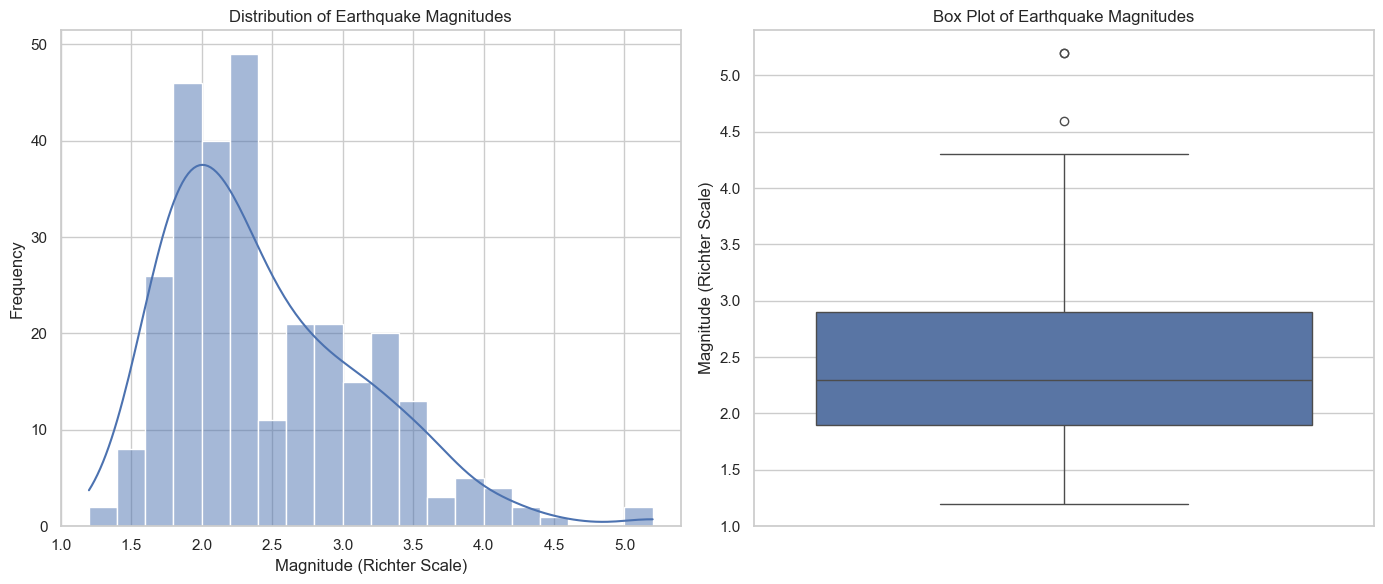


Magnitude Summary:
count    289.000000
mean       2.446713
std        0.706073
min        1.200000
25%        1.900000
50%        2.300000
75%        2.900000
max        5.200000
Name: Buyukluk, dtype: float64
Most frequent magnitude range appears around: 1.8


In [20]:
# 1. Distribution of Earthquake Magnitudes ('Buyukluk')
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Buyukluk'], bins=20, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude (Richter Scale)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Buyukluk'])
plt.title('Box Plot of Earthquake Magnitudes')
plt.ylabel('Magnitude (Richter Scale)')
plt.tight_layout()
plt.show()

print(f"\nMagnitude Summary:\n{df['Buyukluk'].describe()}")
print(f"Most frequent magnitude range appears around: {df['Buyukluk'].mode()[0] if not df['Buyukluk'].mode().empty else 'N/A'}")

**Magnitude Observations:**
*   Observe the shape of the distribution (e.g., skewed right, meaning more smaller earthquakes).
*   Identify the range, median, and mean magnitude.
*   Note any outliers (potential significant events or data errors). The dataset shows a range up to 5.2, with most events being smaller.

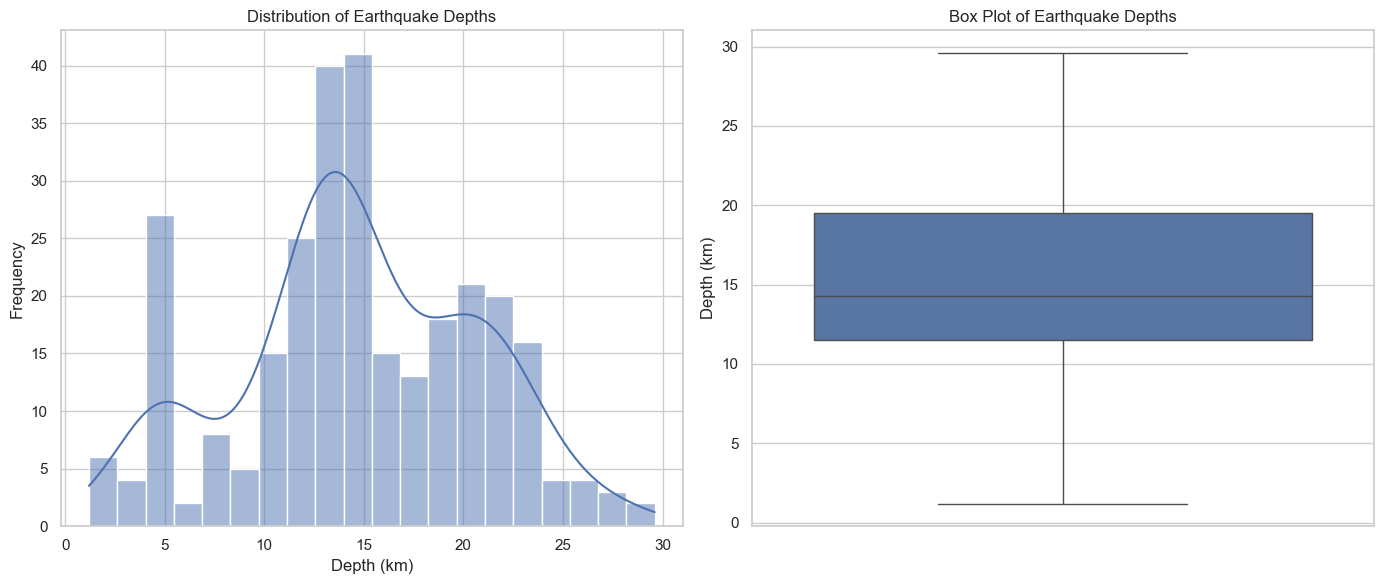


Depth Summary:
count    289.000000
mean      14.656747
std        5.984137
min        1.200000
25%       11.500000
50%       14.300000
75%       19.500000
max       29.600000
Name: Derinlik_km, dtype: float64
Most earthquakes occur at depths around: 14.3 km (median)


In [21]:
# 2. Distribution of Earthquake Depths ('Derinlik_km')
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Derinlik_km'], bins=20, kde=True)
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Derinlik_km'])
plt.title('Box Plot of Earthquake Depths')
plt.ylabel('Depth (km)')
plt.tight_layout()
plt.show()

print(f"\nDepth Summary:\n{df['Derinlik_km'].describe()}")
print(f"Most earthquakes occur at depths around: {df['Derinlik_km'].median():.1f} km (median)")

**Depth Observations:**
*   Examine the distribution of depths. Are most earthquakes shallow or deep?
*   The Marmara region often experiences relatively shallow earthquakes. Check if the data reflects this. The summary shows a median depth around 15km, with a range from very shallow (1.2km) to deeper (~30km).
*   Look for potential clusters at specific depths.

### 3.2. Temporal Analysis (Time-Based Patterns)

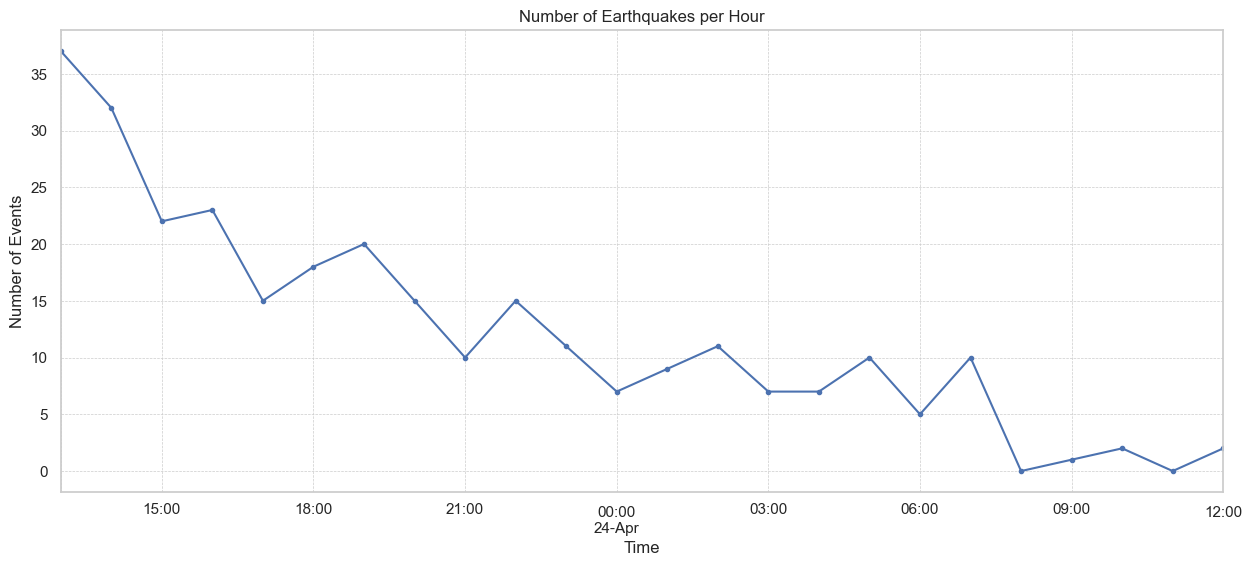

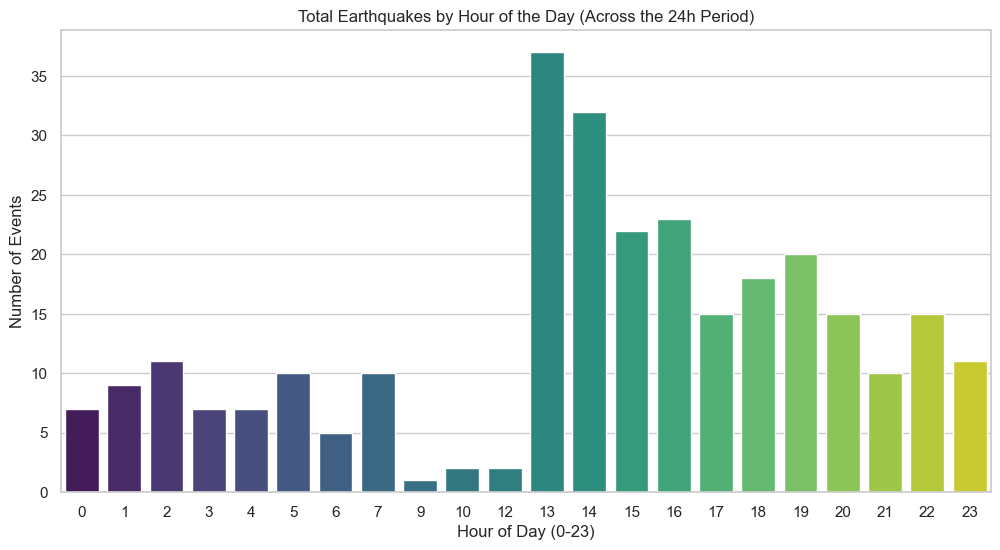

In [22]:
# Ensure data is sorted by time
df = df.sort_values('Olus_Zamani').reset_index(drop=True)

# 1. Earthquakes over Time (Frequency)
plt.figure(figsize=(15, 6))
# Resample by hour to see frequency
hourly_counts = df.set_index('Olus_Zamani').resample('H').size()
hourly_counts.plot(kind='line', marker='.', linestyle='-')
plt.title('Number of Earthquakes per Hour')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Extract hour of the day
df['Hour'] = df['Olus_Zamani'].dt.hour

# 2. Earthquakes by Hour of Day
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Total Earthquakes by Hour of the Day (Across the 24h Period)')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Events')
plt.show()

**Temporal Observations:**
*   The first plot shows the timeline of events. Are there bursts of activity (potential swarms or aftershocks)? The data shows significant activity concentrated within the first few hours of the dataset (around 13:00 - 15:00 on 2025-04-23).
*   The second plot aggregates counts by the hour. Is there a particular time of day with more activity within this 24-hour window?
*   Note: With only 24 hours of data, long-term patterns (daily, weekly) cannot be determined.

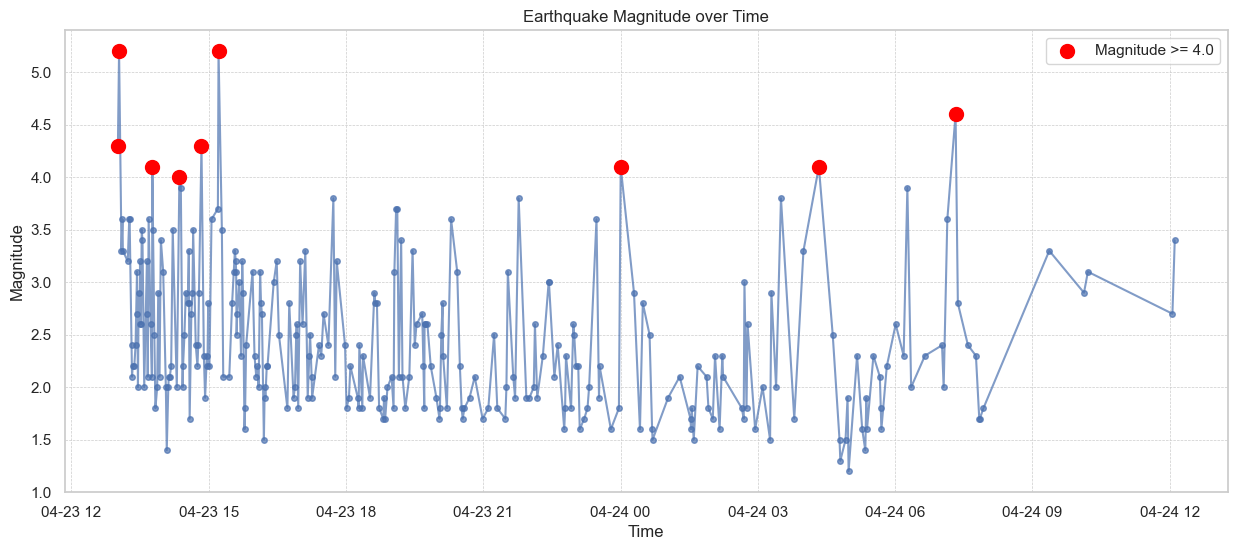


--- Significant Earthquakes (Magnitude >= 4.0) ---
            Olus_Zamani    Enlem   Boylam  Derinlik_km  Buyukluk  \
0   2025-04-23 13:01:02  40.8427  28.3802         21.3       4.3   
1   2025-04-23 13:02:32  40.8640  28.4223         18.7       5.2   
29  2025-04-23 13:46:13  40.8652  28.2913         17.0       4.1   
46  2025-04-23 14:21:39  40.8512  28.4108         20.7       4.0   
63  2025-04-23 14:50:35  40.8215  28.3265          9.5       4.3   
72  2025-04-23 15:12:57  40.8247  28.3187         10.5       5.2   
218 2025-04-24 00:00:15  40.8570  28.2945         13.6       4.1   
252 2025-04-24 04:20:03  40.8217  28.1293         12.9       4.1   
277 2025-04-24 07:19:18  40.8447  28.3080         16.9       4.6   

                Yer  
0    MARMARA DENIZI  
1    MARMARA DENIZI  
29   MARMARA DENIZI  
46   MARMARA DENIZI  
63   MARMARA DENIZI  
72   MARMARA DENIZI  
218  MARMARA DENIZI  
252  MARMARA DENIZI  
277  MARMARA DENIZI  


In [23]:
# 3. Magnitude over Time
plt.figure(figsize=(15, 6))
plt.plot(df['Olus_Zamani'], df['Buyukluk'], marker='o', linestyle='-', markersize=4, alpha=0.7)
plt.title('Earthquake Magnitude over Time')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Highlight significant earthquakes (e.g., Magnitude >= 4.0)
significant_quakes = df[df['Buyukluk'] >= 4.0]
plt.scatter(significant_quakes['Olus_Zamani'], significant_quakes['Buyukluk'], color='red', s=100, label='Magnitude >= 4.0', zorder=5)
plt.legend()
plt.show()

print("\n--- Significant Earthquakes (Magnitude >= 4.0) ---")
print(significant_quakes[['Olus_Zamani', 'Enlem', 'Boylam', 'Derinlik_km', 'Buyukluk', 'Yer']])

**Magnitude Over Time Observations:**
*   Observe how magnitude varies over the 24-hour period.
*   The plot clearly shows the largest events (highlighted in red). Are larger events followed by smaller ones (aftershocks)? Yes, the initial large events (4.3, 5.2) are followed by a dense cluster of smaller events. There are other moderate peaks later as well.

### 3.3. Geospatial Analysis (Mapping the Epicenters)

In [24]:
# Calculate map center (approximate Marmara region)
map_center = [df['Enlem'].mean(), df['Boylam'].mean()]

# Create a Folium map
m = folium.Map(location=map_center, zoom_start=9, tiles='CartoDB positron')

# Add points for each earthquake
# Color and size points based on magnitude
def get_color(magnitude):
    if magnitude < 2.5:
        return 'blue'
    elif magnitude < 4.0:
        return 'green'
    elif magnitude < 5.0:
        return 'orange'
    else:
        return 'red'

for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Enlem'], row['Boylam']],
        radius=row['Buyukluk'] * 1.5,  # Scale radius by magnitude
        color=get_color(row['Buyukluk']),
        fill=True,
        fill_color=get_color(row['Buyukluk']),
        fill_opacity=0.6,
        popup=(f"Magnitude: {row['Buyukluk']}<br>"
               f"Depth: {row['Derinlik_km']} km<br>"
               f"Time: {row['Olus_Zamani']}<br>"
               f"Location: {row['Yer']}")
    ).add_to(m)

# Add a heatmap layer
heat_data = [[row['Enlem'], row['Boylam']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=15).add_to(m)


# Display the map (this will show in the notebook output)
print("\n--- Displaying Interactive Map ---")
m


--- Displaying Interactive Map ---


**Geospatial Observations:**
*   The map shows the spatial distribution of earthquake epicenters.
*   Are the events clustered in specific areas? Yes, there's a clear concentration in the Marmara Sea, particularly south/southwest of Istanbul, aligning with known fault segments.
*   The heatmap visually represents the density of events.
*   The color and size of markers indicate the magnitude, highlighting the locations of stronger earthquakes. Note the cluster of activity near Silivri and Gürpınar offshore areas.
*   Observe the few outlier events (e.g., Ege Denizi, Nigde, Kutahya) that are outside the main Marmara cluster but included in the dataset timeframe.

### 3.4. Location Analysis ('Yer' Column)

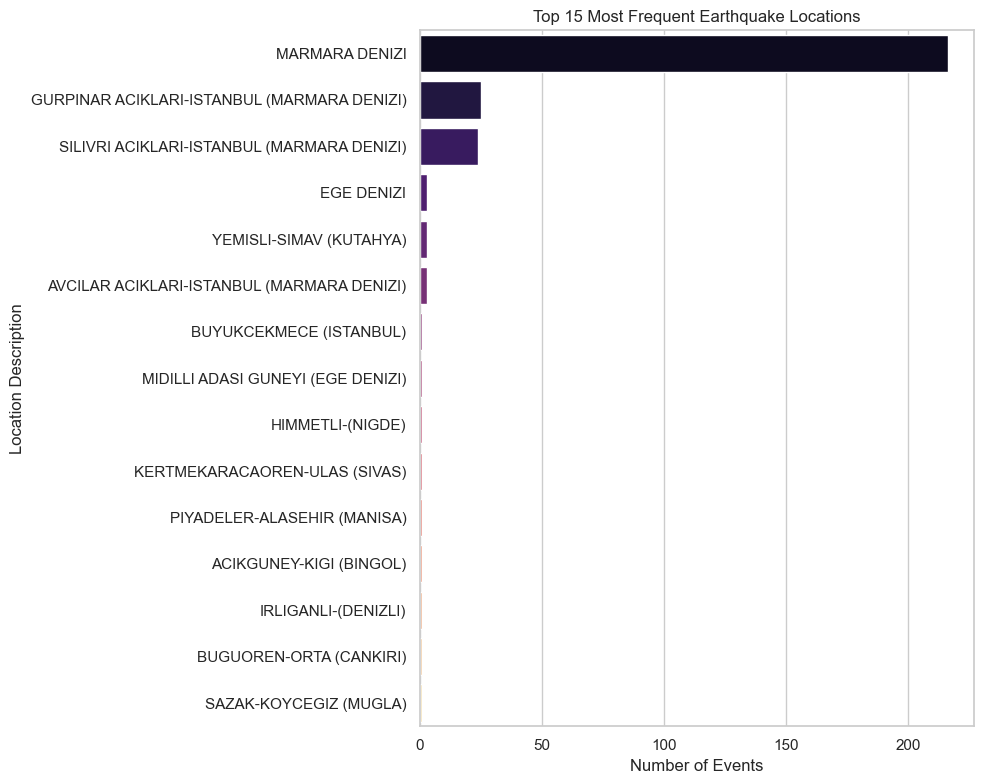


--- Top 15 Locations by Event Count ---
Yer
MARMARA DENIZI                                 216
GURPINAR ACIKLARI-ISTANBUL (MARMARA DENIZI)     25
SILIVRI ACIKLARI-ISTANBUL (MARMARA DENIZI)      24
EGE DENIZI                                       3
YEMISLI-SIMAV (KUTAHYA)                          3
AVCILAR ACIKLARI-ISTANBUL (MARMARA DENIZI)       3
BUYUKCEKMECE (ISTANBUL)                          1
MIDILLI ADASI GUNEYI (EGE DENIZI)                1
HIMMETLI-(NIGDE)                                 1
KERTMEKARACAOREN-ULAS (SIVAS)                    1
PIYADELER-ALASEHIR (MANISA)                      1
ACIKGUNEY-KIGI (BINGOL)                          1
IRLIGANLI-(DENIZLI)                              1
BUGUOREN-ORTA (CANKIRI)                          1
SAZAK-KOYCEGIZ (MUGLA)                           1
Name: count, dtype: int64


In [25]:
# Analyze the descriptive location names
top_locations = df['Yer'].value_counts().head(15)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_locations.index, x=top_locations.values, palette='magma')
plt.title('Top 15 Most Frequent Earthquake Locations')
plt.xlabel('Number of Events')
plt.ylabel('Location Description')
plt.tight_layout()
plt.show()

print("\n--- Top 15 Locations by Event Count ---")
print(top_locations)

**Location Observations:**
*   The bar chart shows the most frequent locations reported.
*   "MARMARA DENIZI" is the most common generic location. Specific areas like "SILIVRI ACIKLARI-ISTANBUL (MARMARA DENIZI)" and "GURPINAR ACIKLARI-ISTANBUL (MARMARA DENIZI)" also feature prominently, confirming the concentration seen on the map.
*   This highlights the specific zones within the Marmara Sea experiencing the most activity during this period.

### 3.5. Bivariate Analysis (Relationships Between Variables)

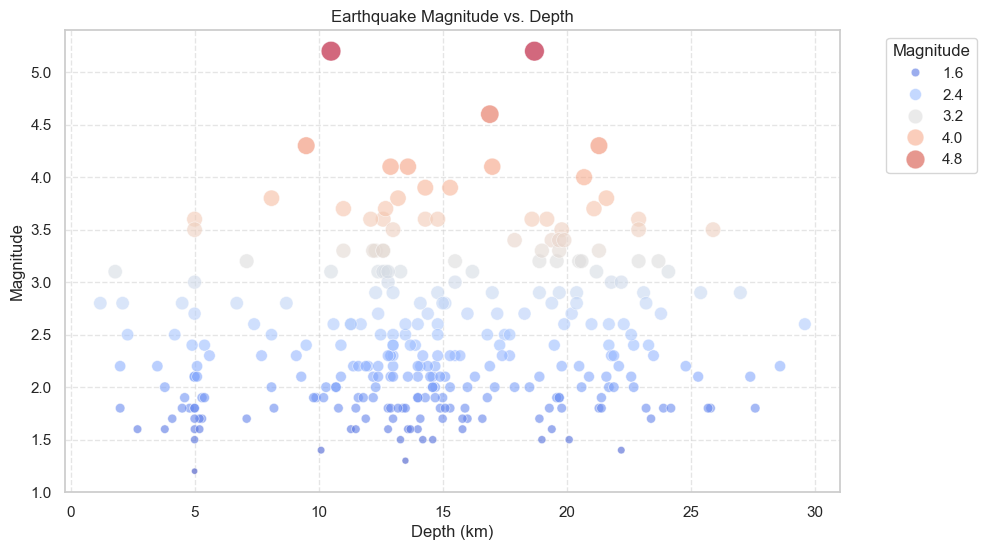


Correlation between Magnitude and Depth: 0.137


In [26]:
# 1. Magnitude vs. Depth
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Derinlik_km', y='Buyukluk', alpha=0.6, hue='Buyukluk', palette='coolwarm', size='Buyukluk', sizes=(20, 200))
plt.title('Earthquake Magnitude vs. Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.legend(title='Magnitude', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Calculate correlation (keeping in mind correlation doesn't imply causation)
correlation = df['Buyukluk'].corr(df['Derinlik_km'])
print(f"\nCorrelation between Magnitude and Depth: {correlation:.3f}")

**Magnitude vs. Depth Observations:**
*   Examine the scatter plot for any relationship between magnitude and depth.
*   In this dataset, there doesn't appear to be a strong linear correlation. Significant events (larger magnitudes) occur across various depths within the observed range (mostly < 25 km).
*   The correlation coefficient confirms a weak relationship for this specific 24-hour dataset. Tectonic settings determine the depth-magnitude relationship, which can be complex.

***

## 4. Deeper Dive & Specific Questions

Address some of the analytical use cases mentioned in the metadata.

### 4.1. Seismic Clustering Check

Visually, the map already showed clustering. Formal algorithms like DBSCAN or K-Means could be applied to the latitude and longitude data (`Enlem`, `Boylam`) to quantitatively identify clusters.

In [29]:
# Example placeholder for formal clustering (requires scikit-learn)
from sklearn.cluster import DBSCAN
coordinates = df[['Enlem', 'Boylam']].values
db = DBSCAN(eps=0.1, min_samples=5).fit(coordinates) # Adjust eps (radius) and min_samples
df['Cluster'] = db.labels_
print("\nCluster analysis (DBSCAN):")
print(df['Cluster'].value_counts())
# Cluster -1 typically indicates noise points (outliers)

# For now, we rely on the visual clustering observed in the Folium map and heatmap.
print("Visual inspection via the map indicates significant clustering in the Marmara Sea.")
print("Formal clustering (e.g., DBSCAN) could be applied for quantitative analysis.")


Cluster analysis (DBSCAN):
Cluster
 0    265
-1     24
Name: count, dtype: int64
Visual inspection via the map indicates significant clustering in the Marmara Sea.
Formal clustering (e.g., DBSCAN) could be applied for quantitative analysis.


### 4.2. Analysis of Strongest Events

Let's look closer at the characteristics of the earthquakes with magnitude 4.0 or higher.

In [28]:
# We already identified these:
print("\n--- Recap: Significant Earthquakes (Magnitude >= 4.0) ---")
print(significant_quakes[['Olus_Zamani', 'Enlem', 'Boylam', 'Derinlik_km', 'Buyukluk', 'Yer']])

# Analyze their timing and location relative to each other
# The Magnitude over Time plot and the Map already help visualize this.
# The strongest events (5.2) occurred early in the sequence.
first_strong_time = significant_quakes['Olus_Zamani'].min()
last_strong_time = significant_quakes['Olus_Zamani'].max()

print(f"\nTime of first significant event (>=4.0): {first_strong_time}")
print(f"Time of last significant event (>=4.0) within this dataset: {last_strong_time}")

# Check average depth of significant vs non-significant events
avg_depth_strong = significant_quakes['Derinlik_km'].mean()
avg_depth_weak = df[df['Buyukluk'] < 4.0]['Derinlik_km'].mean()
print(f"\nAverage depth of significant events (>=4.0): {avg_depth_strong:.2f} km")
print(f"Average depth of weaker events (<4.0): {avg_depth_weak:.2f} km")


--- Recap: Significant Earthquakes (Magnitude >= 4.0) ---
            Olus_Zamani    Enlem   Boylam  Derinlik_km  Buyukluk  \
0   2025-04-23 13:01:02  40.8427  28.3802         21.3       4.3   
1   2025-04-23 13:02:32  40.8640  28.4223         18.7       5.2   
29  2025-04-23 13:46:13  40.8652  28.2913         17.0       4.1   
46  2025-04-23 14:21:39  40.8512  28.4108         20.7       4.0   
63  2025-04-23 14:50:35  40.8215  28.3265          9.5       4.3   
72  2025-04-23 15:12:57  40.8247  28.3187         10.5       5.2   
218 2025-04-24 00:00:15  40.8570  28.2945         13.6       4.1   
252 2025-04-24 04:20:03  40.8217  28.1293         12.9       4.1   
277 2025-04-24 07:19:18  40.8447  28.3080         16.9       4.6   

                Yer  
0    MARMARA DENIZI  
1    MARMARA DENIZI  
29   MARMARA DENIZI  
46   MARMARA DENIZI  
63   MARMARA DENIZI  
72   MARMARA DENIZI  
218  MARMARA DENIZI  
252  MARMARA DENIZI  
277  MARMARA DENIZI  

Time of first significant event (>=4.0)

**Strong Event Observations:**
*   There were multiple events with magnitude >= 4.0, including two >= 5.0.
*   These occurred relatively early in the 24-hour period.
*   Their depths vary but are generally within the common range observed for other events in the dataset. There isn't a dramatic difference in average depth between stronger and weaker events in this specific dataset.
*   Their locations are within the main cluster in the Marmara Sea.

***

## 5. Conclusion and Next Steps

This analysis explored a 24-hour snapshot of seismic activity in the Marmara region using data from [Boğaziçi University Kandilli Observatory and Earthquake Research Institute](http://www.koeri.boun.edu.tr/new/en) (KOERI).

**Summary of Findings:**

1.  **High Activity:** The dataset captured 289 seismic events in 24 hours, indicating significant tectonic activity.
2.  **Magnitude Distribution:** Most events were of low magnitude (< 3.0), but several moderate-to-strong events occurred, with the largest reaching magnitude 5.2.
3.  **Depth Distribution:** Earthquakes occurred predominantly at shallow to intermediate depths (median ~15 km), consistent with activity along the NAF in this region.
4.  **Spatial Concentration:** Epicenters were heavily clustered in the Marmara Sea, particularly offshore from Silivri and Gürpınar, southwest of Istanbul. A few events occurred further away (Aegean Sea, inland Turkey).
5.  **Temporal Patterns:** The activity was not evenly distributed over time; a significant burst of events, including the strongest ones, occurred within the first few hours of the recorded period (around 13:00-15:00 on Apr 23).
6.  **Magnitude-Depth:** No strong linear correlation between magnitude and depth was observed in this short timeframe.

**Limitations:**

*   **Short Duration:** 24 hours is too short to identify long-term seismicity patterns, cycles, or definitive precursor activity.
*   **Data Scope:** While comprehensive for the period, it doesn't include historical context or detailed fault line information within the notebook itself.

**Potential Next Steps:**

1.  **Longer Time Series Analysis:** Analyze data over weeks, months, or years to understand baseline seismicity, identify trends, and potentially correlate activity with larger historical events.
2.  **Fault Line Integration:** Overlay known NAF segments and other fault lines onto the geospatial map for more precise spatial correlation.
3.  **Statistical Modeling:** Explore relationships further, potentially using regression models or time-series models like ARIMA (though more data is needed).
4.  **Machine Learning:** Apply clustering algorithms (DBSCAN, K-Means) more formally. For larger datasets, investigate classification models to predict event characteristics or potential early warning triggers (requires careful feature engineering and validation).
5.  **Compare with Other Sources:** Cross-reference data with other seismological centers (e.g., USGS, EMSC) if available for validation or broader context.
6.  **Interactive Dashboard:** Develop a dashboard (using Plotly Dash or Streamlit) for dynamic exploration of the data.

This notebook provides a foundational analysis of the provided dataset, highlighting the dynamic seismic nature of the Marmara region and offering a starting point for more advanced research.